In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
import datetime

In [2]:
df = pd.read_csv(r'C:\Users\KSSEEB\OneDrive\Documents\Machine Learning\Linear Regression\Real_Estate.csv')

In [3]:
df.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


In [4]:
df.tail()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
409,2013-07-25 15:30:36.565239,18.3,170.12890,6,24.981186,121.486798,29.096310
410,2013-07-26 17:16:34.019780,11.9,323.69120,2,24.950070,121.483918,33.871347
411,2013-07-28 21:47:23.339050,0.0,451.64190,8,24.963901,121.543387,25.255105
412,2013-07-29 13:33:29.405317,35.9,292.99780,5,24.997863,121.558286,25.285620
413,2013-08-01 09:49:41.506402,12.0,90.45606,6,24.952904,121.526395,37.580554


In [5]:
df.shape

(414, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


In [8]:
df.isnull().sum()

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

In [11]:
df[df.duplicated()]

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
House age,414.0,18.405072,11.757670,0.000000,9.900000,16.450000,30.375000,42.700000
Distance to the nearest MRT station,414.0,1064.468233,1196.749385,23.382840,289.324800,506.114400,1454.279000,6306.153000
Number of convenience stores,414.0,4.265700,2.880498,0.000000,2.000000,5.000000,6.750000,10.000000
Latitude,414.0,24.973605,0.024178,24.932075,24.952422,24.974353,24.994947,25.014578
Longitude,414.0,121.520268,0.026989,121.473888,121.496866,121.520912,121.544676,121.565321
House price of unit area,414.0,29.102149,15.750935,0.000000,18.422493,30.394070,40.615184,65.571716


In [17]:
df.dtypes

Transaction date                        object
House age                              float64
Distance to the nearest MRT station    float64
Number of convenience stores             int64
Latitude                               float64
Longitude                              float64
House price of unit area               float64
dtype: object

In [18]:
df.columns

Index(['Transaction date', 'House age', 'Distance to the nearest MRT station',
       'Number of convenience stores', 'Latitude', 'Longitude',
       'House price of unit area'],
      dtype='object')

In [19]:
# Assuming the "Transaction date" column is in the format YYYY-MM-DD
df['Date'] = pd.to_datetime(df['Transaction date'].str.split().str[0], format='%Y-%m-%d')
df['Time'] = pd.to_timedelta(df['Transaction date'].str.split().str[1])

# Now you can extract the year using pd.DatetimeIndex()
df['Year'] = pd.DatetimeIndex(df['Transaction date']).year

df.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area,Date,Time,Year
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673,2012-09-02,0 days 16:42:30.519336,2012
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725,2012-09-04,0 days 22:52:29.919544,2012
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267,2012-09-05,0 days 01:10:52.349449,2012
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638,2012-09-05,0 days 13:26:01.189083,2012
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710,2012-09-06,0 days 08:29:47.910523,2012


In [20]:
num = df.drop(['Transaction date', 'Latitude','Longitude','Date','Time'],axis=1)
num

,House age,Distance to the nearest MRT station,Number of convenience stores,House price of unit area,Year
0,13.3,4082.01500,8,6.488673,2012
1,35.5,274.01440,2,24.970725,2012
2,1.1,1978.67100,10,26.694267,2012
3,22.2,1055.06700,5,38.091638,2012
4,8.5,967.40000,6,21.654710,2012
...,...,...,...,...,...
409,18.3,170.12890,6,29.096310,2013
410,11.9,323.69120,2,33.871347,2013
411,0.0,451.64190,8,25.255105,2013
412,35.9,292.99780,5,25.285620,2013


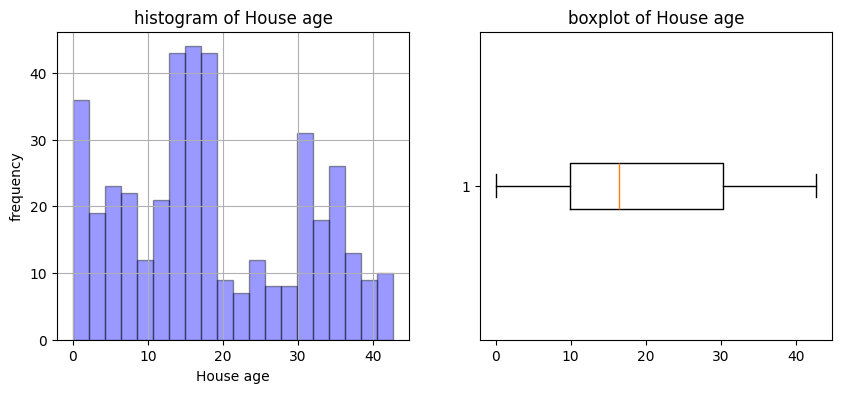

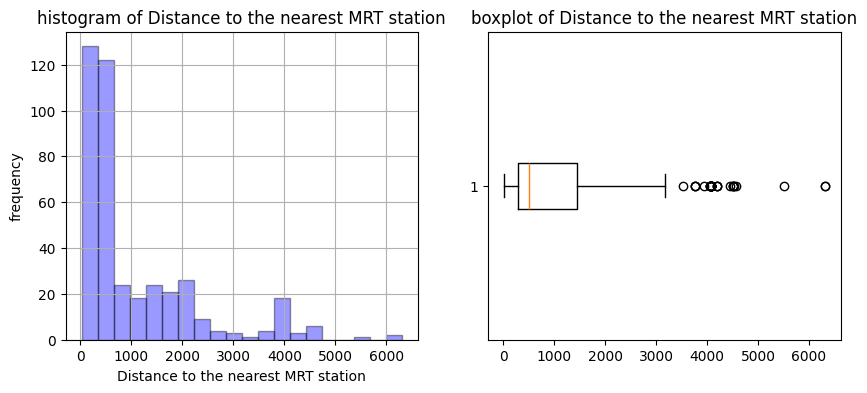

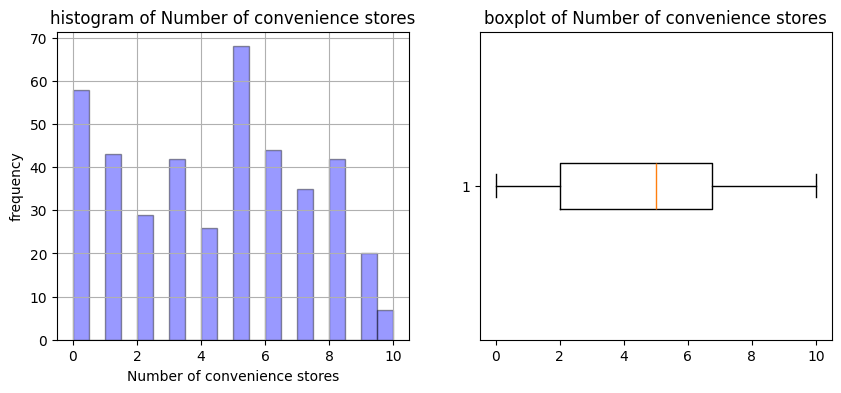

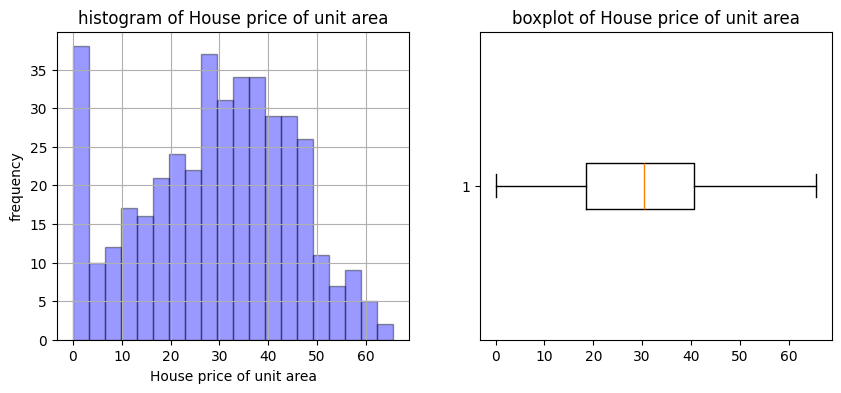

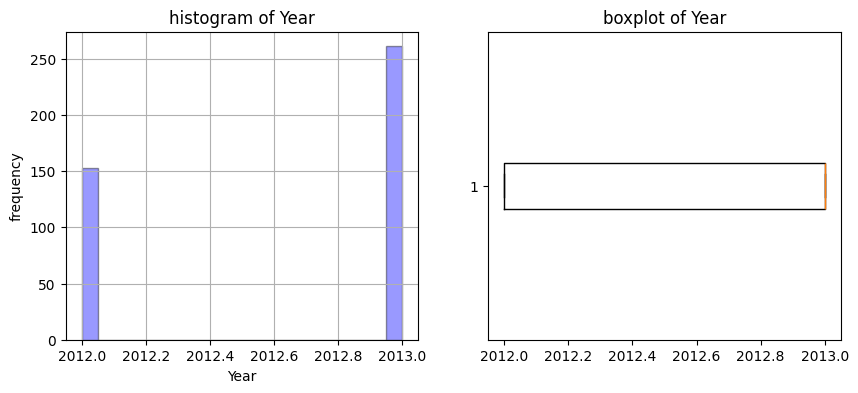

In [26]:
for i in num.columns:

    plt.figure(figsize=(10,4))

    plt.subplot(1,2,1)
    df[i].hist(bins=20,alpha=0.4,color='b',edgecolor='black')
    plt.title(f'histogram of {i}')
    plt.xlabel(i)
    plt.ylabel('frequency')

    plt.subplot(1,2,2)
    plt.boxplot(df[i],vert=False)
    plt.title(f'boxplot of {i}')

<Axes: >

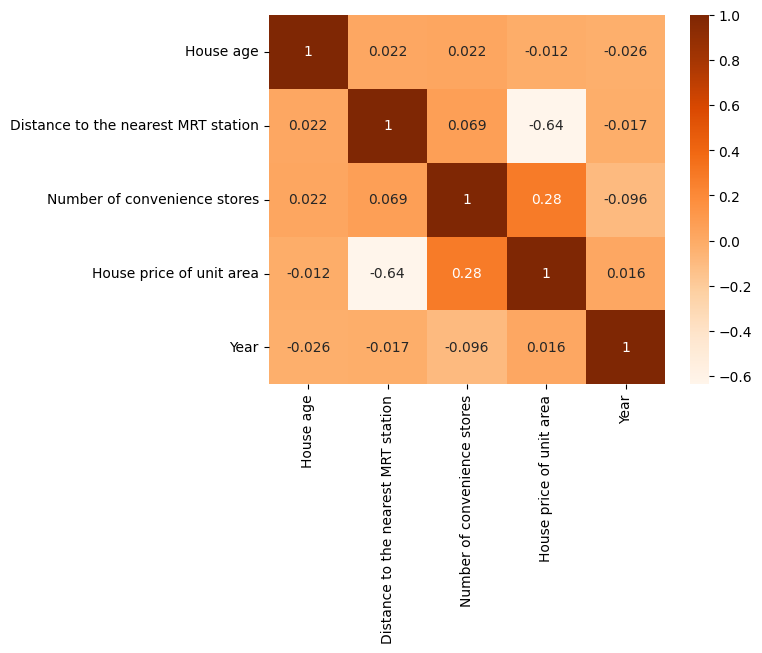

In [27]:
corr = num.corr(method='pearson')
sns.heatmap(corr,annot=True,cmap='Oranges')

In [28]:
df.columns

Index(['Transaction date', 'House age', 'Distance to the nearest MRT station',
       'Number of convenience stores', 'Latitude', 'Longitude',
       'House price of unit area', 'Date', 'Time', 'Year'],
      dtype='object')

In [29]:
X = df[['House age', 'Distance to the nearest MRT station','Number of convenience stores']]
y = df['House price of unit area']

In [31]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [33]:
y_pred = model.predict(X)

In [38]:
y_pred

array([  9.63003888,  31.79502598,  31.52739234,  30.46753971,
        33.10833994,  31.90564277,  32.65848087,  34.87596286,
        30.68143379,  42.22935283,  33.17583482,  42.57259429,
        46.28887114,  31.08737701,  38.10949794,  39.54559321,
        27.95523391,  -4.60299989,  36.73394632,  30.86060135,
        38.63663176,  19.90684011,  34.17147679,  39.78065038,
        29.13062309,  14.084764  ,  15.07007964,  26.21812475,
        26.09810521,  15.77375466,  34.65594593,  21.86229122,
        33.73577392,  31.69372589,  20.57436017,   9.50783457,
        35.54538781,  40.86859208,  35.38030932,  32.3620498 ,
        42.61479907,  33.59771349,  33.14769006,  19.94690598,
        20.47355776,  34.41868736,  28.26360458,  32.55732594,
        46.03721614,  11.89184927,  35.32610098,  32.90553696,
        34.47115659,   8.45686756,  31.41111571,  27.01123489,
        31.6102024 ,  12.90660355,  30.77228526,  21.68153495,
        18.03723981,   6.05460141,  43.47459678,  -3.03

ValueError: x and y must be the same size

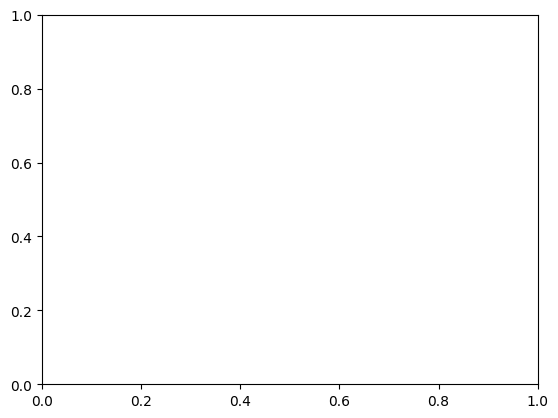

In [41]:
# visualising the linear regression results
plt.scatter(X,y,color='blue')
plt.plot(X,y_pred, color='red')
plt.title('Linear regression')
plt.xlabel('Temperature')
plt.ylabel('pressure')